In [32]:
import numpy
import matplotlib.pyplot as plot

In [38]:
def predict(x, w):
    return numpy.dot(x, w)

In [39]:
def loss_function(w, x, y):
    m = len(y)
    predicted = predict(x, w)
    loss = (1 / (2 * m)) * numpy.sum((predicted - y) ** 2)
    return loss

In [40]:
def gradient_descent(x, y, w, alpha, iterations, tolerance, print_epoch=True):
    m = len(y)
    loss_history = numpy.zeros(iterations)
    weight_history = numpy.zeros((iterations, 2))

    for iteration in range(iterations):
        prediction = predict(x, w)
        old_w = w
        w = old_w - (alpha / m) * numpy.dot(x.T, prediction - y)

        weight_history[iteration, :] = w.T
        loss_history[iteration]  = loss_function(w, x, y)

        if numpy.abs(old_w[0][0] - w[0][0]) <= tolerance and numpy.abs(old_w[1][0] - w[1][0]) <= tolerance:
            print(f"Stopped at {iteration} iteration")
            loss_history = loss_history[numpy.where(loss_history != 0)]
            weight_history = weight_history[~numpy.all(weight_history == 0, axis=1)]
            break

        if print_epoch:
            print(f"Epoch {iteration}: [w0 = %.3f\tw1 = %.3f]\t"
                  f"Loss = %.2f" % (w[0][0], w[1][0],
                                    loss_history[iteration]))

    return w, loss_history, weight_history

In [41]:
def main():
    alpha = 0.1
    tolerance = 0.0001
    iterations = 10000
    w = numpy.random.randn(2, 1)

    data_train = numpy.genfromtxt('lab_1_train.csv', delimiter=',')[1:]
    x_train = data_train[:, [1]]
    X_train = numpy.c_[numpy.ones((len(x_train), 1)), x_train]
    y_train = data_train[:, [2]]
    plot.scatter(x_train, y_train, marker = '.')
    plot.show()

    data_test = numpy.genfromtxt('lab_1_test.csv', delimiter=',')[1:]
    x_test = data_test[:, [1]]
    X_test = numpy.c_[numpy.ones((len(x_test), 1)), x_test]
    y_test = data_test[:, [2]]

    w, loss_history, weight_history = gradient_descent(
        X_train, y_train, w, iterations=iterations, alpha=alpha, tolerance=tolerance, print_epoch=False
    )

    print(f"w0 = {w[0][0]}\tw1 = {w[1][0]}")
    y_predicted = predict(X_test, w)
    print(f"Loss function: {loss_function(w, X_test, y_test)}")

    plot.scatter(x_test, y_test, marker = '.')
    plot.plot(x_test, y_predicted, color = 'orange')
    plot.show()

    x = numpy.concatenate((x_train, x_test))
    y = numpy.concatenate((y_train, y_test))
    y_train_predicted = predict(X_train, w)

    plot.scatter(x, y, marker = '.')
    plot.plot(x_test, y_predicted, color = 'orange')
    plot.plot(x_train, y_train_predicted, color = 'red')
    plot.show()

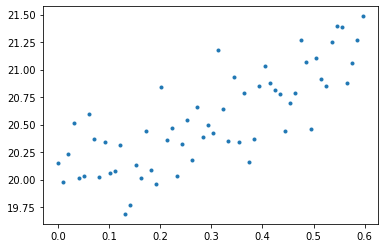

Stopped at 1634 iteration
w0 = 19.94902223809013	w1 = 2.014348777553413
Loss function: 0.03714904134448685


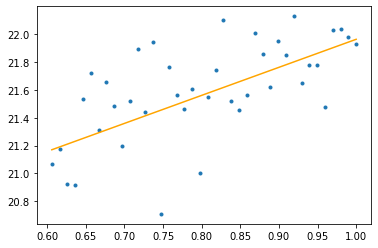

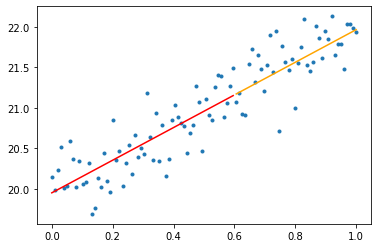

In [42]:
main()